## Libraries and Environment

In [1]:
#Essential libraries for data representation
import pandas as pd
import numpy as np

#Display and plotting libraries
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

#Statistics libraries
from scipy import stats
from collections import Counter

#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

# For dimension reduction
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

#DNN libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
data_song = pd.read_csv("Data\song_dataset.csv")
data_song.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


In [11]:
songs = data_song[['song', 'title']].drop_duplicates()
songs.head(10)

,song,title
0,SOAKIMP12A8C130995,The Cove
1,SOAPDEY12A81C210A9,Nothing from Nothing
2,SOBBMDR12A8C13253B,Entre Dos Aguas
3,SOBFNSP12AF72A0E22,Under Cold Blue Stars
4,SOBFOVM12A58A7D494,Riot Radio (Soundtrack Version)
5,SOBNZDC12A6D4FC103,Sin límites (I)
6,SOBSUJE12A6D4F8CF5,12 segundos de oscuridad
7,SOBVFZR12A6D4F8AE3,Ears To The Ground (Album Version)
8,SOBXALG12A8C13C108,Food Chain (Album Version)
9,SOBXHDL12A81C204C0,Stronger


In [92]:
data_song.tail()

,user,song,play_count,title,release,artist_name,year
102622,21f4ac98aa1665bd42027ba12184a939ff435f59,SOKAKHH12AF72A5BAF,3,87,Hopeless Romantic,Bouncing Souls,1999
102623,21f4ac98aa1665bd42027ba12184a939ff435f59,SONPOXM12A8C1440C2,4,Space Olympics,Incredibad,The Lonely Island,2009
102624,21f4ac98aa1665bd42027ba12184a939ff435f59,SOPREHY12AB01815F9,8,I'm On A Boat,Incredibad,The Lonely Island / T-Pain,2009
102625,21f4ac98aa1665bd42027ba12184a939ff435f59,SOQXKUV12A6D4FB4C9,3,Amityville,The Marshall Mathers LP,Eminem / Bizarre,2000
102626,21f4ac98aa1665bd42027ba12184a939ff435f59,SOSJRJP12A6D4F826F,18,Master Of Puppets,Master Of Puppets,Metallica,1986


## Basic Information

In [41]:
print(f"Shape of the song dataset:  \n\t{data_song.shape[0]} rows \n\t{data_song.shape[1]} columns")

Shape of the song dataset:  
	102627 rows 
	7 columns


#### Column Names

In [42]:
print("The columns of the song dataset: \n")
columns_df = pd.DataFrame(data_song.columns, columns=['Column Names'])
columns_df

The columns of the song dataset: 



,Column Names
0,user
1,song
2,play_count
3,title
4,release
5,artist_name
6,year


- “user” is the ID of the listener
- “song” is the ID of the song listened
- “play_count” is the number of times the song was listened by the user.
- “title” is the name of the song
- “release” is the name of the album
- “artist_name” is the name of the artist
- “year” is the release year.

#### Data type

In [43]:
# Display data type of each column
data_types = data_song.dtypes
print("Data types of each column: \n")
print(data_types)

Data types of each column: 

user           object
song           object
play_count      int64
title          object
release        object
artist_name    object
year            int64
dtype: object


#### Genaral information

In [44]:
print("General information about the song dataset: \n")
print(data_song.info())

General information about the song dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.5+ MB
None


#### Basic Statistic

In [45]:
print("Statistical summary description: \n")
data_song.describe() 

Statistical summary description: 



,play_count,year
count,102627.000000,102627.000000
mean,2.885790,1624.812389
std,8.569376,781.595402
min,1.000000,0.000000
25%,1.000000,1984.000000
50%,1.000000,2002.000000
75%,3.000000,2007.000000
max,1890.000000,2010.000000


####  Missing values

In [93]:
# Check for missing values in the DataFrame
missing_values = data_song.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data_song)) * 100

# Create a DataFrame containing information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the count of missing values for each column
print("The count of missing values for each column: \n")
missing_info

The count of missing values for each column: 



,Missing Values,Percentage
user,0,0.0
song,0,0.0
play_count,0,0.0
title,0,0.0
release,0,0.0
artist_name,0,0.0
year,0,0.0


#### Duplication checking

In [12]:
# Check for duplicates in the song dataset
duplicates = data_song.duplicated()

# Calculate the percentage of duplicate rows
duplicate_percentage = (duplicates.sum() / len(data_song)) * 100

# Information about duplicates
print(f"\nTotal number of duplicate rows: {duplicates.sum()}")
print(f"Percentage of duplicate: {duplicate_percentage:.2f}%")

# Display duplicate rows
data_song[duplicates].head(10)


Total number of duplicate rows: 1055
Percentage of duplicate: 1.03%


,user,song,play_count,title,release,artist_name,year
10,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
197,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOVEUVC12A6310EAF1,5,Just Lose It,Curtain Call,Eminem,2004
311,b64cdd1a0bd907e5e00b39e345194768e330d652,SOLQYOG12B0B80BA71,2,The Prime Time Of Your Life,Human After All,Daft Punk,2005
771,5a905f000fc1ff3df7ca807d57edb608863db05d,SOLQYOG12B0B80BA71,2,The Prime Time Of Your Life,Human After All,Daft Punk,2005
898,5a905f000fc1ff3df7ca807d57edb608863db05d,SORRCNC12A8C13FDA9,1,Is This It,Is This It,The Strokes,2001
949,5a905f000fc1ff3df7ca807d57edb608863db05d,SOUZBUD12A8C13FD8E,1,Killing Lies,First Impressions Of Earth,The Strokes,2005
1360,bd8475385f0aa78830fa6dfce9e7242164b035c8,SOAVWHY12AB017C6C0,1,Losing Touch,Day & Age,The Killers,2008
1385,bd8475385f0aa78830fa6dfce9e7242164b035c8,SOETQJP12A6D4F6731,1,Not Big,Alright_ Still,Lily Allen,2006
1443,bd8475385f0aa78830fa6dfce9e7242164b035c8,SONVJUL12A6701FB7A,1,The Damage In Your Heart,Make Believe,Weezer,2005
1465,bd8475385f0aa78830fa6dfce9e7242164b035c8,SOSDTGC12AF72A2BC3,1,Chinese,It's Not Me_ It's You,Lily Allen,2009


#### Number of Unique Values

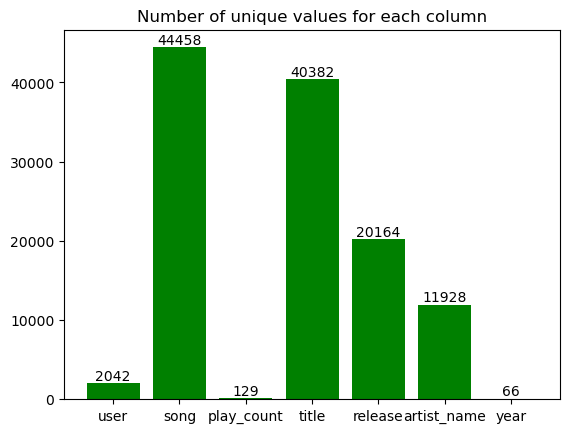

In [48]:
# Use nunique() to count the number of unique values in each column
unique_counts = data_song.nunique()

# Display the number of unique values in the form of a chart
fig, ax = plt.subplots()
bars = ax.bar(unique_counts.index, unique_counts, color="green")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
ax.set_title('Number of unique values for each column')
plt.show()

#### Get a count of the 'None', 'Null' & empty string and zero values

In [76]:
# Function to check for NULL, None, empty string, and 0 values"
def check_values(value):
    return value == "Null" or value is None or value == '' or value == "0" or value == 0

# Check for each columns
result = data_song.applymap(check_values).sum()

# Calculate percentage
percentage_result = (result / len(data_song)) * 100

# Show result
result_df = pd.DataFrame({
    'Count': result, 
    'Percentage': percentage_result})

print("The number of rows containing Null, None, empty string, or 0 values is:")
result_df

The number of rows containing Null, None, empty string, or 0 values is:


,Count,Percentage
user,0,0.000000
song,0,0.000000
play_count,0,0.000000
title,0,0.000000
release,0,0.000000
artist_name,0,0.000000
year,19283,18.789402


#### Check for outliers
- Use a boxplot to identify values that fall outside the normal range

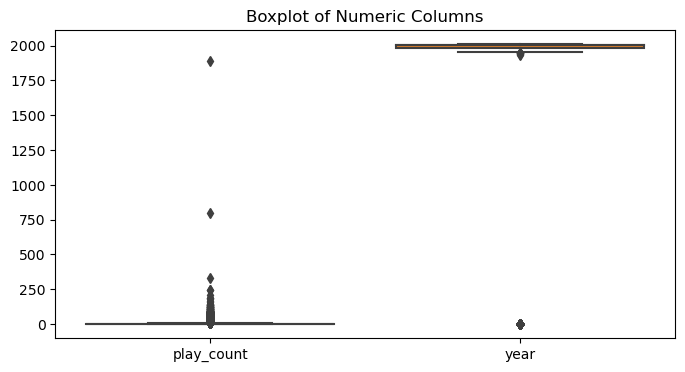

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_song)
plt.title("Boxplot of Numeric Columns")
plt.show()

In [63]:
(data_song["play_count"] > 6).sum()

8527

In [108]:
(data_song["year"] ==0).sum()

19283

## Data Cleaning

### Remove duplicate values 

In [13]:
# Remove rows with duplicate values based on all columns
song_df = data_song.drop_duplicates()

# Display the size of the song dataset after removing duplicate values.
print(f"The size of the song dataset after removing duplicate values:  \n\t{song_df.shape[0]} rows \n\t{song_df.shape[1]} columns")

The size of the song dataset after removing duplicate values:  
	101572 rows 
	7 columns


## Remove outliers

### i. play_count values  

- Determine the lower bound and upper bound to identify outliers.
- Values outside this range will be considered outliers and be removed

In [14]:
# Determine the values Q1 and Q3
Q1_pc = song_df['play_count'].quantile(0.25)
Q3_pc = song_df['play_count'].quantile(0.75)

# Determine the "interquartile range" (IQR)
IQR_pc = Q3_pc - Q1_pc

# Determine lower and upper thresholds to identify outliers
lower_bound_pc = Q1_pc - 1.5 * IQR_pc
upper_bound_pc = Q3_pc + 1.5 * IQR_pc

# Display lower and uppoer bound
print("Lower bound of play_count value: ", lower_bound_pc)
print("Upper bound of play_count value: ", upper_bound_pc)

Lower bound of play_count value:  -2.0
Upper bound of play_count value:  6.0


In [15]:
from sklearn.impute import KNNImputer

In [16]:
# Remove lines containing outliers
song_df = song_df[(song_df['play_count'] >= lower_bound_pc) & (song_df['play_count'] <= upper_bound_pc)]

# Display the size of the song dataset after removing play_count outliers
print(f"The size of the song dataset after removing play_count outliers:  \n\t{song_df.shape[0]} rows \n\t{song_df.shape[1]} columns")

The size of the song dataset after removing play_count outliers:  
	93099 rows 
	7 columns


### ii. year values

In [17]:
# Xác định các giá trị Q1 và Q3
Q1_year = song_df['year'].quantile(0.25)
Q3_year = song_df['year'].quantile(0.75)

# Xác định khoảng giá trị "interquartile range" (IQR)
IQR_year = Q3_year - Q1_year

# Xác định ngưỡng dưới và trên để xác định giá trị ngoại lệ
lower_bound_yr = Q1_year - 1.5 * IQR_year
upper_bound_yr = Q3_year + 1.5 * IQR_year

print("Lower bound of play_count value: ", lower_bound_yr)
print("Upper bound of play_count value: ", upper_bound_yr)

Lower bound of play_count value:  1949.5
Upper bound of play_count value:  2041.5


In [109]:
# Thay thế 0 bằng NaN trong cột "year"
song_df['year'] = song_df['year'].replace(0, pd.NaT)

# Tạo một DataFrame mới chứa các giá trị không phải là 0 trong cột "year" để huấn luyện mô hình
train_data = song_df[song_df['year'].notnull()]

# Tạo một DataFrame mới chứa các giá trị là 0 trong cột "year" để dự đoán
predict_data = song_df[song_df['year'].isnull()]

# Chia thành features (X) và target (y)
X_train = train_data.drop('year', axis=1)
y_train = train_data['year']
X_predict = predict_data.drop('year', axis=1)

# Chắc chắn rằng không có cột kiểu chuỗi trong X_train
X_train = X_train.select_dtypes(exclude=['object'])

# Sử dụng mô hình K-Nearest Neighbors để dự đoán giá trị thiếu
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(X_train)

# Điền giá trị thiếu trong cột "year" với các giá trị dự đoán
song_df.loc[song_df['year'].isnull(), 'year'] = imputed_values[:, X_train.columns.get_loc('year')]

# Hiển thị DataFrame sau khi điền giá trị
song_df.head()

KeyError: 'year'

In [18]:
# Remove lines containing outliers
song_df = song_df[(song_df['year'] >= lower_bound_yr) & (song_df['year'] <= upper_bound_yr)]

# Display the size of the song dataset after removing year outliers
print(f"The size of the song dataset after removing year outliers:  \n\t{song_df.shape[0]} rows \n\t{song_df.shape[1]} columns")

The size of the song dataset after removing year outliers:  
	75650 rows 
	7 columns


In [19]:
# Save cleaned dataset
song_df.to_csv("cleaned_song_dataset.csv", index=False)

In [20]:
pd.read_csv("cleaned_song_dataset.csv").head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,12 segundos de oscuridad,10 + Downloaded,Jorge Drexler,2006
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1,Ears To The Ground (Album Version),Under Cold Blue Stars,Josh Rouse,2002


## Exploratory Data Analysis 

- What are the most listened songs?
- Who are the most popular artists?
- How is the distribution of song count for users?

### i. What are the most listened song? 

##### Ver 1. 

In [22]:
most_listened_songs = song_df.sort_values(by='play_count', ascending=False)

# Show top 10 most listened songs
top_10_songs = most_listened_songs.head(10)

# Display result
print("Top 10 most listened songs:")
top_10_songs

Top 10 most listened songs:


,user,song,play_count,title,release,artist_name,year
5246,95942345306393998eb3a051ae5fa3c4d5afbaa4,SONQUQF12A8AE476D3,6,Raid,Madvillainy,Madvillain_ MED aka Medaphor,2004
40385,d8df72fc0d892328e92a8e7129805da4f14d65f9,SOGNRNF12A8C140591,6,Sound System,Steel Pulse/ Toots & The Maytals/ Third World,Steel Pulse,1979
84827,ac1c7a488e016d477fd6d23ef45a8a48643c02e7,SOSOBZN12A8C1443D6,6,Busy Child,Vegas - (10th Anniversary Edition),The Crystal Method,1997
69378,34c327464b7c8eaf912e6ba37cadcb64514b5900,SOKOBXE12A67ADA4BE,6,Cuckoo For Caca,King For a Day_ Fool For a Lifetime,Faith No More,1995
4044,01655ae6bc52e29c9cd100a7dde4e9eeae5e4031,SOENSSK12A8AE478BF,6,Airwar,Airwar,Crystal Castles,2007
84876,ac1c7a488e016d477fd6d23ef45a8a48643c02e7,SOUTXVB12A58A7D30D,6,Irina,Ryan Leslie,Ryan Leslie,2009
56624,71c1e74cec63f582da9ff77bf0dcdc06819a9740,SONYKOW12AB01849C9,6,Secrets,Waking Up,OneRepublic,2009
2024,a58de017cbeda1763ea002fe027ed41b4ed53109,SOWEJXA12A6701C574,6,Fix You,X & Y,Coldplay,2005
40339,f625cabc005f268d8d9f5a46c4072bd49e3e6d4c,SOIDDNJ12AC9071B90,6,That Should Be Me,My Worlds,Justin Bieber,2010
11845,c01f9838d66929bd2494eb8e627054024a13d5c4,SOFJXMM12AB01851AD,6,Out On The Tiles (Album Version),Think This,Toxik,1989


##### Ver 2. Calculate the total number of listens for each song to determine the most listened to songs

In [23]:
# Calculate the total number of listens for each song
total_listen_count = song_df.groupby('title')['play_count'].sum()

# sorted by total number of listens in descending order
most_listened_songs = total_listen_count.sort_values(ascending=False)

# Displays the 10 most listened to songs
top_10_songs = pd.DataFrame(most_listened_songs.nlargest(10))

# Show result
print("Top 10 most listened songs with total listen count:")
top_10_songs

Top 10 most listened songs with total listen count:


,play_count
title,
Use Somebody,340
Undo,333
Secrets,320
You're The One,316
Somebody To Love,293
Yellow,285
Revelry,281
Love Story,268
Fireflies,242


<Figure size 1200x600 with 0 Axes>

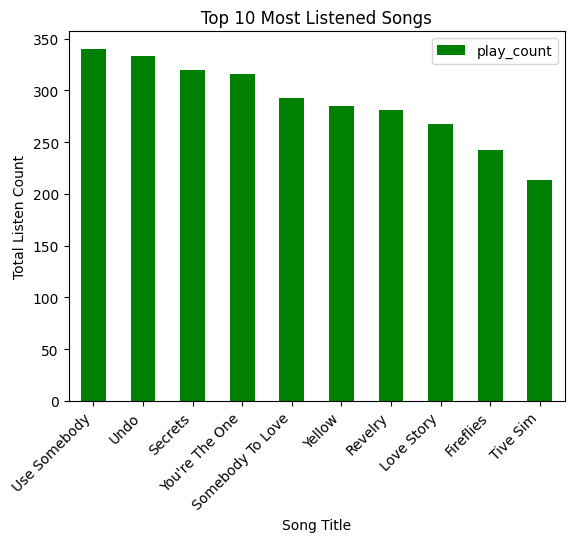

In [24]:
# Visualization
plt.figure(figsize=(12, 6))
top_10_songs.plot(kind='bar', color='green')
plt.title('Top 10 Most Listened Songs')
plt.xlabel('Song Title')
plt.ylabel('Total Listen Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [25]:
# test
song_df.loc[song_df['title'] == 'Use Somebody', 'play_count'].sum()

340

### ii. Who are the most popular artists?

In [26]:
# Calculate the total number of listens for each artist
total_listen_count_by_artist = song_df.groupby('artist_name')['play_count'].sum()

# Sort by total number of listens in descending order
most_popular_artists = total_listen_count_by_artist.sort_values(ascending=False)

# Showing the 10 most popular artists
top_10_artists = pd.DataFrame(most_popular_artists.head(10))

# Display result 
top_10_artists


,play_count
artist_name,
Coldplay,1367
The Black Keys,1152
Kings Of Leon,966
Eminem,840
Justin Bieber,774
Jack Johnson,740
Daft Punk,648
Radiohead,638
OneRepublic,616


<Figure size 1200x600 with 0 Axes>

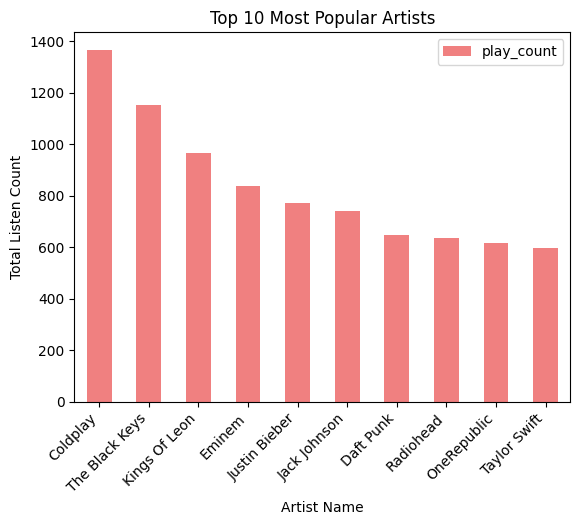

In [27]:
# Draw a column chart
plt.figure(figsize=(12, 6))
top_10_artists.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Artist Name')
plt.ylabel('Total Listen Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [28]:
top_10_artists_bottom = most_popular_artists.tail(10)
top_10_artists_bottom

artist_name
Nadia Ali                  1
Nagisa Ni Te               1
Naked Eyes                 1
Nakisenyi Women's Group    1
Nanci Griffith             1
Nancy Wilson               1
Narco                      1
Narcotic Thrust            1
Nas featuring Mobb Deep    1
Lawrence Arabia            1
Name: play_count, dtype: int64

### iii. How is the distribution of song count for users?

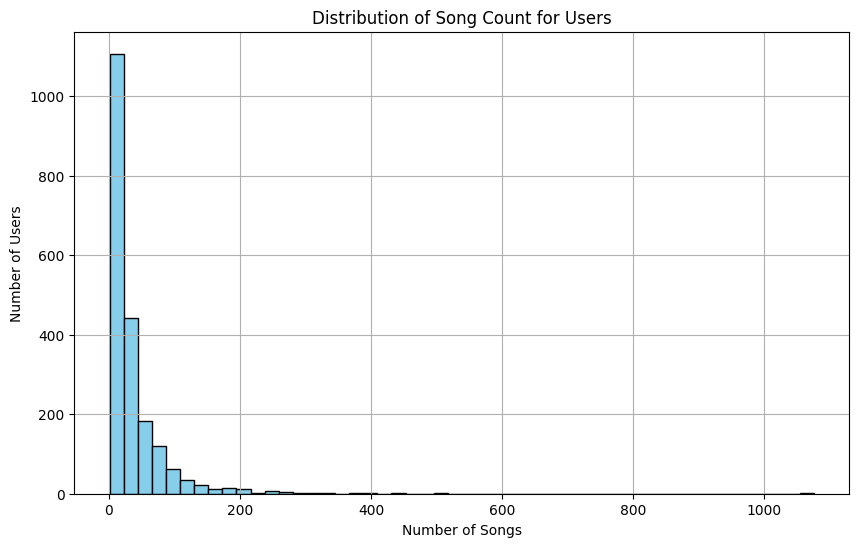

In [29]:
# Get the number of songs for each user
song_count_per_user = song_df.groupby('user')['song'].count()

# plot distribution
plt.figure(figsize=(10, 6))
plt.hist(song_count_per_user, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Count for Users')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

### discuss your findings.

## Implement a recommendation engine


-   Implement a recommendation engine which takes as input a user in the database and recommends one (or multiple) song(s) he has not listened to yet

In [38]:
from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split

# Create a Reader object to define the play_count range
reader = Reader(rating_scale=(0, song_df['play_count'].max()))

# Create a dataset from song_df dataframe
data = Dataset.load_from_df(song_df[['user', 'title', 'play_count']], reader)

# Divide the data into training set and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Collaborative Filtering
collab_model = KNNBasic(sim_options={'user_based': True})
collab_model.fit(trainset)


# A recommendation function using Collaborative Filtering
def collaborative_filtering_recommendation(user_id, model, df):
    # Get a list of all songs listened to by the user
    listened_songs = df[df['user'] == user_id]['song'].tolist()

    # Find unheard songs
    all_songs = df['title'].unique()
    unheard_songs = [song for song in all_songs if song not in listened_songs]

    # Give users suggestions from unheard songs
    recommendations = [(song, model.predict(user_id, song).est) for song in unheard_songs]

    # Sort and get top k suggestions
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:10]
    
    return recommendations


Computing the msd similarity matrix...
Done computing similarity matrix.


In [41]:
# Test
user_id = '59bad0aea569a12d785e401d185f8814d128333e'

# Collaborative Filtering
collab_recommendations = collaborative_filtering_recommendation(user_id, collab_model, song_df)

# In ra kết quả
print("Collaborative Filtering Recommendations:")
for recommendation in collab_recommendations: 
    print(f"Song: {recommendation[0]} - Estimate: {recommendation[1]}")

Collaborative Filtering Recommendations:
Song: Imma Be - Estimate: 6
Song: Déjame Ir - Estimate: 6
Song: El Hombre Dirigente - Estimate: 6
Song: Always - Estimate: 6
Song: Para Volver A Amar - Estimate: 6
Song: Kansas City - Estimate: 6
Song: Move Ya Body - Estimate: 6
Song: Undo - Estimate: 5.999999999999999
Song: Definition Of A Hero - Estimate: 5.999999999999999
Song: There's A Fire - Estimate: 5.999999999999999


In [42]:
song_df[song_df["user"] == "59bad0aea569a12d785e401d185f8814d128333e"]

,user,song,play_count,title,release,artist_name,year
99541,59bad0aea569a12d785e401d185f8814d128333e,SOBEVOP12A8AE4988E,1,Heaven On Earth,Blackout,Britney Spears,2007
99543,59bad0aea569a12d785e401d185f8814d128333e,SOCUYHY12AB018A0C8,1,3,3,Britney Spears,2009
99545,59bad0aea569a12d785e401d185f8814d128333e,SOFYOBA12A8C13E1B5,2,(I Got That) Boom Boom,In The Zone,Britney Spears featuring Ying Yang Twins,2003
99547,59bad0aea569a12d785e401d185f8814d128333e,SOJOIMC12AB01800A0,1,...Baby One More Time,Essential - Girls Night In,Britney Spears,1998
99548,59bad0aea569a12d785e401d185f8814d128333e,SOJTUED12AF729F915,2,Bailamos,Greatest Hits,Enrique Iglesias,1998
99549,59bad0aea569a12d785e401d185f8814d128333e,SOJTUED12AF729F915,2,Bailamos,Hero,Enrique Iglesias,1998
99552,59bad0aea569a12d785e401d185f8814d128333e,SOQVJWF12A58A801EF,5,Animal,Animal,Ke$ha,2010
99553,59bad0aea569a12d785e401d185f8814d128333e,SOSDGEH12A8C13E0F5,1,Cuentame,Barrio Fino,Daddy Yankee,2004
99554,59bad0aea569a12d785e401d185f8814d128333e,SOUSZSW12AB01800C2,1,Toxic,The Singles Collection,Britney Spears,2003
99558,59bad0aea569a12d785e401d185f8814d128333e,SOWAJYA12A67020673,1,El Muro,Barrio Fino,Daddy Yankee,2004


## API 

In [44]:
!pip install flask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 13.3 MB/s eta 0:00:00


### Collaborative Filtering:
**Pros:**
- Does not require information about the content of the products.
- Effective with large datasets and can uncover complex relationships.

**Cons:**
- For new users, there may not be enough information to make accurate recommendations.
- Faces the cold start problem with new products or users.

### Content-Based Filtering:

**Pros:**

- Recommends based on specific user preferences.
- Addresses the cold start problem with new users.

**Cons:**
- Requires detailed information about the content of the products.
- Difficulties handling both diversity and information loss simultaneously.

### Hybrid Methods:

**Pros:**
- Combines the advantages of both collaborative and content-based methods.
- Can mitigate the cold start problem and improve recommendation accuracy.
  
**Cons:**
- Complex deployment and maintenance processes.

### Matrix Factorization (SVD, ALS):
  
**Pros:**
- Performs well on large datasets and can handle sparse matrices.
- Effective with the cold start problem.
  
**Cons:**
- Training process can be time-consuming and computationally intensive.
  
### Deep Learning-Based Recommender Systems:
  
**Pros:**
- Capable of learning complex representations of data.
- Effective with large datasets and can handle diverse data types.
  
**Cons:**
- Requires a substantial amount of data for training.
- Demands powerful computational resources.




